In [1]:
import requests as req
from bs4 import BeautifulSoup as bs
import json
import pandas as pd

In [2]:
movies_url = 'https://api.themoviedb.org/3/movie/top_rated?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US'
genre_url = 'https://api.themoviedb.org/3/genre/movie/list?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US'

# Pulling genre details using genre_url

In [3]:
temp = json.loads(req.get(genre_url).content)
temp["genres"]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 80, 'name': 'Crime'},
 {'id': 99, 'name': 'Documentary'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 36, 'name': 'History'},
 {'id': 27, 'name': 'Horror'},
 {'id': 10402, 'name': 'Music'},
 {'id': 9648, 'name': 'Mystery'},
 {'id': 10749, 'name': 'Romance'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 10770, 'name': 'TV Movie'},
 {'id': 53, 'name': 'Thriller'},
 {'id': 10752, 'name': 'War'},
 {'id': 37, 'name': 'Western'}]

In [4]:
genre_data = pd.DataFrame(temp['genres']).sort_values(by='id')
genre_data

,id,name
1,12,Adventure
8,14,Fantasy
2,16,Animation
6,18,Drama
10,27,Horror
0,28,Action
3,35,Comedy
9,36,History
18,37,Western
16,53,Thriller


# Pulling Movies details using movies url

In [5]:
all_movies = []

In [6]:
for page in range(1, 472):
    url = f"{movies_url}page={page}"
    response = req.get(url)
    
    if response.status_code == 200:
        data = response.json()
        if "results" in data:
            all_movies.extend(data["results"])
    else:
        print(f"Failed to fetch page {page}")

In [7]:
movies_data = pd.DataFrame(all_movies)
movies_data.shape

(9420, 14)

In [8]:
def add_genres(genre_ids):
    genres = []
    for gid in genre_ids:
        row = genre_data[genre_data['id']==gid]
        genres.append(row['name'].iloc[0])
    return genres

In [9]:
movies_data['genre'] = movies_data['genre_ids'].apply(add_genres)
movies_data

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genre
0,False,/zfbjgQE1uSd9wiPTX4VzsLi0rGG.jpg,"[18, 80]",278,en,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,216.951,/9cqNxx0GxF0bflZmeSMuL5tnGzr.jpg,1994-09-23,The Shawshank Redemption,False,8.708,27677,"[Drama, Crime]"
1,False,/rSPw7tgCH9c6NqICZef4kZjFOQ5.jpg,"[18, 80]",238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",209.471,/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,1972-03-14,The Godfather,False,8.688,20991,"[Drama, Crime]"
2,False,/kGzFbGhp99zva6oZODW5atUtnqi.jpg,"[18, 80]",240,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,110.969,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,1974-12-20,The Godfather Part II,False,8.569,12667,"[Drama, Crime]"
3,False,/zb6fM1CX41D9rF9hdgclu0peUmy.jpg,"[18, 36, 10752]",424,en,Schindler's List,The true story of how businessman Oskar Schind...,130.704,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,1993-12-15,Schindler's List,False,8.568,16122,"[Drama, History, War]"
4,False,/bxgTSUenZDHNFerQ1whRKplrMKF.jpg,[18],389,en,12 Angry Men,The defense and the prosecution have rested an...,66.891,/ow3wq89wM8qd5X7hWKxiRfsFf9C.jpg,1957-04-10,12 Angry Men,False,8.547,8855,[Drama]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9415,False,/7TF4p86ZafnxFuNqWdhpHXFO244.jpg,"[18, 80]",769,en,GoodFellas,"The true story of Henry Hill, a half-Irish, ha...",83.596,/aKuFiU82s5ISJpGZp7YkIr3kCUd.jpg,1990-09-12,GoodFellas,False,8.457,13088,"[Drama, Crime]"
9416,False,/sJNNMCc6B7KZIY3LH3JMYJJNH5j.jpg,"[28, 18]",346,ja,七人の侍,A samurai answers a village's request for prot...,35.558,/ApdijpVm1GNV9BQMOsGcAXq4gEB.jpg,1954-04-26,Seven Samurai,False,8.500,3783,"[Action, Drama]"
9417,False,/vgnoBSVzWAV9sNQUORaDGvDp7wx.jpg,"[12, 18, 878]",157336,en,Interstellar,The adventures of a group of explorers who mak...,352.997,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,2014-11-05,Interstellar,False,8.500,36423,"[Adventure, Drama, Science Fiction]"
9418,False,/dlC0ed9Ugh3FzydnkBtV5lRXUu4.jpg,"[16, 18, 10752]",12477,ja,火垂るの墓,"In the final months of World War II, 14-year-o...",0.072,/k9tv1rXZbOhH7eiCk378x61kNQ1.jpg,1988-04-16,Grave of the Fireflies,False,8.451,5701,"[Animation, Drama, War]"


In [10]:
movies_data['vote_average'].mean(),movies_data['vote_count'].mean()

(8.5197, 17528.15)

In [11]:
movies_data.shape

(9420, 15)

In [12]:
movies_data.to_csv('movies_data.csv',index=False)
genre_data.to_csv('genre_data.csv',index=False)

In [13]:
movies_data['overview'][0]

'Imprisoned in the 1940s for the double murder of his wife and her lover, upstanding banker Andy Dufresne begins a new life at the Shawshank prison, where he puts his accounting skills to work for an amoral warden. During his long stretch in prison, Dufresne comes to be admired by the other inmates -- including an older prisoner named Red -- for his integrity and unquenchable sense of hope.'

In [14]:
import string
exclude = string.punctuation
def remove_special_chars(text):
    return text.translate(str.maketrans("","",exclude))

In [15]:
movies_data['overview'] = movies_data['overview'].apply(remove_special_chars)
movies_data

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genre
0,False,/zfbjgQE1uSd9wiPTX4VzsLi0rGG.jpg,"[18, 80]",278,en,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,216.951,/9cqNxx0GxF0bflZmeSMuL5tnGzr.jpg,1994-09-23,The Shawshank Redemption,False,8.708,27677,"[Drama, Crime]"
1,False,/rSPw7tgCH9c6NqICZef4kZjFOQ5.jpg,"[18, 80]",238,en,The Godfather,Spanning the years 1945 to 1955 a chronicle of...,209.471,/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,1972-03-14,The Godfather,False,8.688,20991,"[Drama, Crime]"
2,False,/kGzFbGhp99zva6oZODW5atUtnqi.jpg,"[18, 80]",240,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,110.969,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,1974-12-20,The Godfather Part II,False,8.569,12667,"[Drama, Crime]"
3,False,/zb6fM1CX41D9rF9hdgclu0peUmy.jpg,"[18, 36, 10752]",424,en,Schindler's List,The true story of how businessman Oskar Schind...,130.704,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,1993-12-15,Schindler's List,False,8.568,16122,"[Drama, History, War]"
4,False,/bxgTSUenZDHNFerQ1whRKplrMKF.jpg,[18],389,en,12 Angry Men,The defense and the prosecution have rested an...,66.891,/ow3wq89wM8qd5X7hWKxiRfsFf9C.jpg,1957-04-10,12 Angry Men,False,8.547,8855,[Drama]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9415,False,/7TF4p86ZafnxFuNqWdhpHXFO244.jpg,"[18, 80]",769,en,GoodFellas,The true story of Henry Hill a halfIrish halfS...,83.596,/aKuFiU82s5ISJpGZp7YkIr3kCUd.jpg,1990-09-12,GoodFellas,False,8.457,13088,"[Drama, Crime]"
9416,False,/sJNNMCc6B7KZIY3LH3JMYJJNH5j.jpg,"[28, 18]",346,ja,七人の侍,A samurai answers a villages request for prote...,35.558,/ApdijpVm1GNV9BQMOsGcAXq4gEB.jpg,1954-04-26,Seven Samurai,False,8.500,3783,"[Action, Drama]"
9417,False,/vgnoBSVzWAV9sNQUORaDGvDp7wx.jpg,"[12, 18, 878]",157336,en,Interstellar,The adventures of a group of explorers who mak...,352.997,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,2014-11-05,Interstellar,False,8.500,36423,"[Adventure, Drama, Science Fiction]"
9418,False,/dlC0ed9Ugh3FzydnkBtV5lRXUu4.jpg,"[16, 18, 10752]",12477,ja,火垂るの墓,In the final months of World War II 14yearold ...,0.072,/k9tv1rXZbOhH7eiCk378x61kNQ1.jpg,1988-04-16,Grave of the Fireflies,False,8.451,5701,"[Animation, Drama, War]"


In [16]:
movies_data['overview'][0]

'Imprisoned in the 1940s for the double murder of his wife and her lover upstanding banker Andy Dufresne begins a new life at the Shawshank prison where he puts his accounting skills to work for an amoral warden During his long stretch in prison Dufresne comes to be admired by the other inmates  including an older prisoner named Red  for his integrity and unquenchable sense of hope'

# Spelling Correction using TextBlob

In [17]:
from textblob import TextBlob
def spelling_correction(text):
    new_text = TextBlob(text)
    return new_text.correct().string

In [ ]:
movies_data['overview'] = movies_data['overview'].apply(spelling_correction)

In [19]:
movies_data

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genre
0,False,/zfbjgQE1uSd9wiPTX4VzsLi0rGG.jpg,"[18, 80]",278,en,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,216.951,/9cqNxx0GxF0bflZmeSMuL5tnGzr.jpg,1994-09-23,The Shawshank Redemption,False,8.708,27677,"[Drama, Crime]"
1,False,/rSPw7tgCH9c6NqICZef4kZjFOQ5.jpg,"[18, 80]",238,en,The Godfather,Spanning the years 1945 to 1955 a chronicle of...,209.471,/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,1972-03-14,The Godfather,False,8.688,20991,"[Drama, Crime]"
2,False,/kGzFbGhp99zva6oZODW5atUtnqi.jpg,"[18, 80]",240,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,110.969,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,1974-12-20,The Godfather Part II,False,8.569,12667,"[Drama, Crime]"
3,False,/zb6fM1CX41D9rF9hdgclu0peUmy.jpg,"[18, 36, 10752]",424,en,Schindler's List,The true story of how businessman Oskar Schind...,130.704,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,1993-12-15,Schindler's List,False,8.568,16122,"[Drama, History, War]"
4,False,/bxgTSUenZDHNFerQ1whRKplrMKF.jpg,[18],389,en,12 Angry Men,The defense and the prosecution have rested an...,66.891,/ow3wq89wM8qd5X7hWKxiRfsFf9C.jpg,1957-04-10,12 Angry Men,False,8.547,8855,[Drama]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9415,False,/7TF4p86ZafnxFuNqWdhpHXFO244.jpg,"[18, 80]",769,en,GoodFellas,The true story of Henry Hill a halfIrish halfS...,83.596,/aKuFiU82s5ISJpGZp7YkIr3kCUd.jpg,1990-09-12,GoodFellas,False,8.457,13088,"[Drama, Crime]"
9416,False,/sJNNMCc6B7KZIY3LH3JMYJJNH5j.jpg,"[28, 18]",346,ja,七人の侍,A samurai answers a villages request for prote...,35.558,/ApdijpVm1GNV9BQMOsGcAXq4gEB.jpg,1954-04-26,Seven Samurai,False,8.500,3783,"[Action, Drama]"
9417,False,/vgnoBSVzWAV9sNQUORaDGvDp7wx.jpg,"[12, 18, 878]",157336,en,Interstellar,The adventures of a group of explorers who mak...,352.997,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,2014-11-05,Interstellar,False,8.500,36423,"[Adventure, Drama, Science Fiction]"
9418,False,/dlC0ed9Ugh3FzydnkBtV5lRXUu4.jpg,"[16, 18, 10752]",12477,ja,火垂るの墓,In the final months of World War II 14yearold ...,0.072,/k9tv1rXZbOhH7eiCk378x61kNQ1.jpg,1988-04-16,Grave of the Fireflies,False,8.451,5701,"[Animation, Drama, War]"


In [23]:
genre_data['name']

1           Adventure
8             Fantasy
2           Animation
6               Drama
10             Horror
0              Action
3              Comedy
9             History
18            Western
16           Thriller
4               Crime
5         Documentary
14    Science Fiction
12            Mystery
11              Music
13            Romance
7              Family
17                War
15           TV Movie
Name: name, dtype: object

In [33]:
from collections import Counter
genre_count = Counter()

for genres in movies_data['genre_ids']: 
    for genre_id in genres:
        genre_name = genre_data.loc[genre_data['id'] == genre_id, 'name'].values
        if len(genre_name) > 0:
            genre_count[genre_name[0]] += 1

genre_df = pd.DataFrame(genre_count.items(), columns=['Genre', 'Count'])

In [35]:
genre_df

,Genre,Count
0,Drama,7536
1,Crime,3297
2,History,471
3,War,942
4,Animation,1413
5,Family,471
6,Fantasy,1413
7,Comedy,1884
8,Romance,1413
9,Action,1413


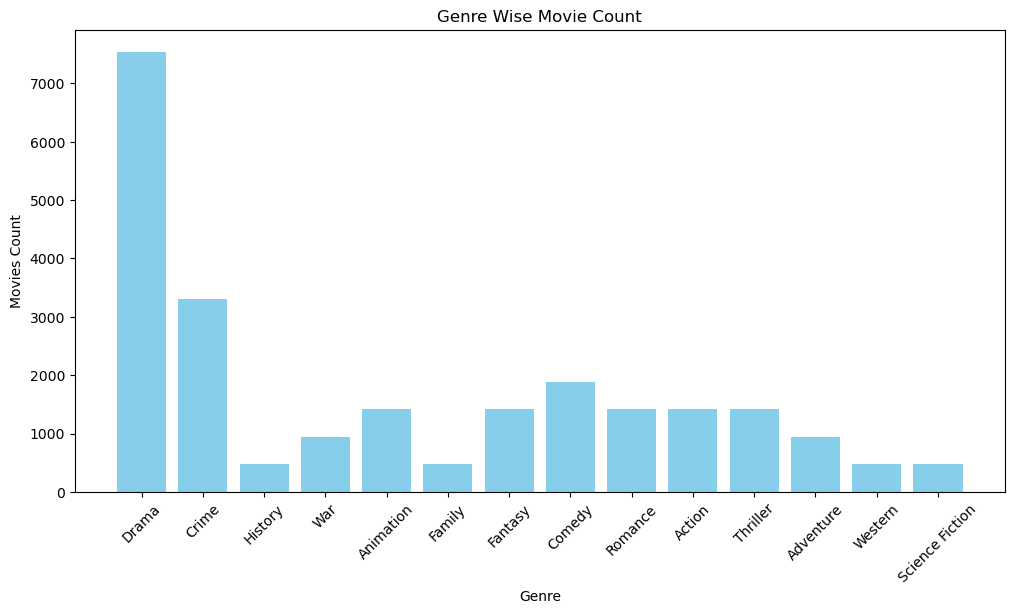

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(genre_df['Genre'],genre_df['Count'],color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Movies Count')
plt.title('Genre Wise Movie Count')
plt.xticks(rotation=45)
plt.show()